In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Let's load in the data

In [4]:
sevens <- read.csv("./data/sevens.csv")
sevens %>% head

,row_id,date,team_1,score_1,score_2,team_2,venue,tournament,stage,t1_game_no,t2_game_no,series,margin,winner,loser,notes
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,NA,1997-03-15,New Zealand Wild Ducks,54,0,Japan,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,54,New Zealand Wild Ducks,Japan,NA
2,2,1997-03-15,England,10,7,Australia,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,3,England,Australia,NA
3,3,1997-03-15,Canada,31,0,Netherlands,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,31,Canada,Netherlands,NA
4,4,1997-03-15,Hong Kong,12,5,Fiji,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,7,Hong Kong,Fiji,NA
5,5,1997-03-15,United States,26,5,Scotland,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,21,United States,Scotland,NA
6,6,1997-03-15,Arabian Gulf,42,0,Singapore,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,42,Arabian Gulf,Singapore,NA


In [9]:
fifteens <- read.csv("./data/fifteens.csv")
fifteens %>% head

,test_no,date,team_1,score_1,score_2,team_2,venue,home_test_no,away_test_no,series_no,tournament,margin_of_victory,home_away_win,winner,loser
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,1982-06-13,Netherlands,0,4,France,Utrecht,1,1,1,Friendly,4,A,France,Netherlands
2,2,1983-06-05,France,10,0,Netherlands,La Teste,2,2,2,Friendly,10,H,France,Netherlands
3,3,1984-05-27,Netherlands,0,3,France,Hilversum,3,3,3,Friendly,3,A,France,Netherlands
4,4,1984-12-31,Sweden,0,34,Netherlands,Malmö,1,4,1,Friendly,34,A,Netherlands,Sweden
5,5,1985-06-02,France,20,0,Netherlands,Bourg en Bresse,4,5,4,Friendly,20,H,France,Netherlands
6,6,1985-06-22,Italy,0,0,France,Riccione,1,5,1,Friendly,0,D,Draw,Draw


I note that the scores for sevens is classed as a `chr` not `int`. Let's fix this

In [22]:
sevens <- sevens[!is.na(as.numeric(as.character(sevens$score_1))),]
sevens <- sevens[!is.na(as.numeric(as.character(sevens$score_2))),]
sevens$score_1 <- as.integer(sevens$score_1)
sevens$score_2 <- as.integer(sevens$score_2)
head(sevens)

,row_id,date,team_1,score_1,score_2,team_2,venue,tournament,stage,t1_game_no,t2_game_no,series,margin,winner,loser,notes
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,NA,1997-03-15,New Zealand Wild Ducks,54,0,Japan,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,54,New Zealand Wild Ducks,Japan,NA
2,2,1997-03-15,England,10,7,Australia,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,3,England,Australia,NA
3,3,1997-03-15,Canada,31,0,Netherlands,Hong Kong,Hong Kong Sevens,Pool A,1,1,1,31,Canada,Netherlands,NA
4,4,1997-03-15,Hong Kong,12,5,Fiji,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,7,Hong Kong,Fiji,NA
5,5,1997-03-15,United States,26,5,Scotland,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,21,United States,Scotland,NA
6,6,1997-03-15,Arabian Gulf,42,0,Singapore,Hong Kong,Hong Kong Sevens,Pool B,1,1,1,42,Arabian Gulf,Singapore,NA


## Home advantage?

Does playing at home have an advantage?

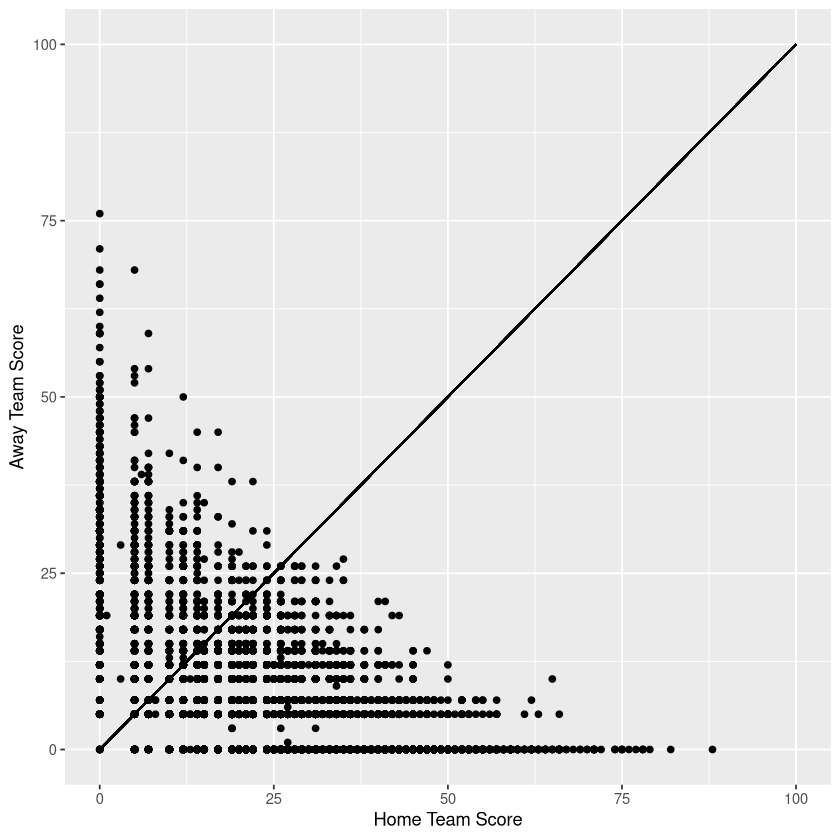

In [25]:
ggplot(sevens, aes(x=score_1, y=score_2)) + 
	geom_point() + 
	labs(x = "Home Team Score", y = "Away Team Score") + 
	geom_segment(aes(x=0, y=0, xend=100, yend=100))

In [26]:
sevens %>% summarise(med_home = median(score_1), med_away = median(score_2))

med_home,med_away
<int>,<int>
22,5


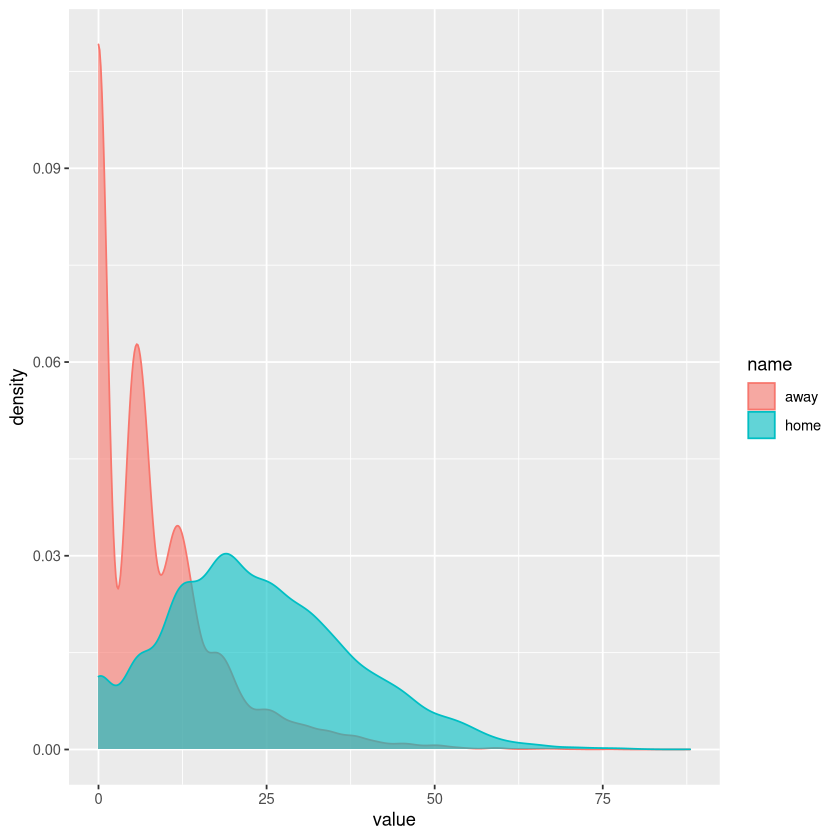

In [44]:
scores = data.frame(home=sevens$score_1, away=sevens$score_2)
scores %>% pivot_longer(cols=c(home, away)) -> scoreslong

ggplot(scoreslong, aes(x=value, colour=name, fill=name)) + geom_density(alpha=0.6)

In [41]:
sevens %>% filter(team_1 == winner) %>% nrow -> n_home_winners
sevens %>% filter(team_1 != winner) %>% nrow -> n_away_winners

n_home_winners / n_away_winners

[1] 4.570927

Seems like there is a definite home advantage in 7s. The probability of a home team winning is $4.571 : 1$

Let's repeat the plot for 15s

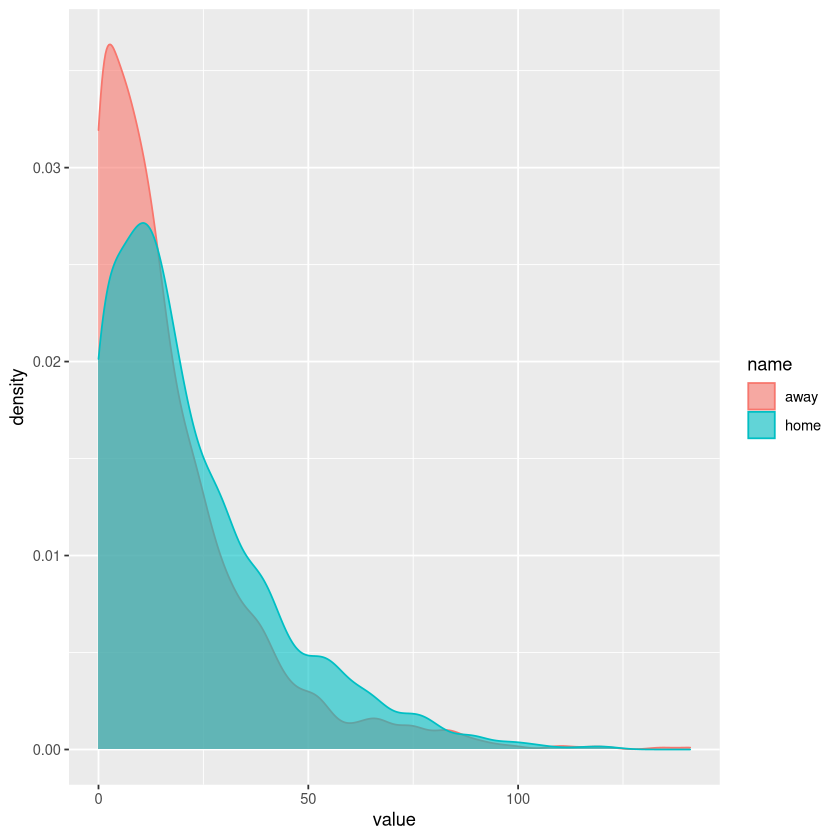

In [45]:
scores15 = data.frame(home=fifteens$score_1, away=fifteens$score_2)
scores15 %>% pivot_longer(cols=c(home, away)) -> scores15long

ggplot(scores15long, aes(x=value, colour=name, fill=name)) + geom_density(alpha=0.6)

In [43]:
fifteens %>% filter(team_1 == winner) %>% nrow -> n_home_winners
fifteens %>% filter(team_1 != winner) %>% nrow -> n_away_winners

n_home_winners / n_away_winners

[1] 1.268934

Home advantage is much stronger in 7s than 15s.

## Which nations are present?

In [7]:
teams7 <- c(sevens$team_1, sevens$team_2)
teams7 <- unique(teams7)
length(teams7)

[1] 152

In [8]:
teams7

[1] "New Zealand Wild Ducks"         "England"                       
  [3] "Canada"                         "Hong Kong"                     
  [5] "United States"                  "Arabian Gulf"                  
  [7] "Scotland"                       "Netherlands"                   
  [9] "Australia"                      "Fiji"                          
 [11] "Trinidad & Tobago"              "Japan"                         
 [13] "Samoa"                          "Singapore"                     
 [15] "New Zealand"                    "Thailand"                      
 [17] "Wales"                          "Kazakhstan"                    
 [19] "Jamaica"                        "Sweden"                        
 [21] "China"                          "Aotearoa Maori New Zealand"    
 [23] "Sri Lanka"                      "Uzbekistan"                    
 [25] "Switzerland"                    "Spain"                         
 [27] "Norway"                         "Belgium"                       
 [29] "Croatia"                        "France"                        
 [31] "Portugal"                       "Tunisia"                       
 [33] "Colombia"                       "Brazil"                        
 [35] "Uruguay"                        "Venezuela"                     
 [37] "Argentina"                      "Chile"                         
 [39] "Paraguay"                       "Rwanda"                        
 [41] "Taiwan"                         "Italy"                         
 [43] "Czechia"                        "Bulgaria"                      
 [45] "Poland"                         "Lithuania"                     
 [47] "Bosnia-Herzegovina"             "Hungary"                       
 [49] "Germany"                        "Austria"                       
 [51] "Russia"                         "Israel"                        
 [53] "Guyana"                         "Saint Lucia"                   
 [55] "Saint Vincent & the Grenadines" "Peru"                          
 [57] "Guam"                           "Luxembourg"                    
 [59] "Romania"                        "Andorra"                       
 [61] "Malta"                          "Ireland"                       
 [63] "Kenya"                          "Uganda"                        
 [65] "Zimbabwe"                       "Zambia"                        
 [67] "Barbados"                       "Finland"                       
 [69] "Denmark"                        "Moldova"                       
 [71] "Latvia"                         "Cambodia"                      
 [73] "South Korea"                    "Laos"                          
 [75] "Papua New Guinea"               "Serbia"                        
 [77] "Slovenia"                       "Réunion"                       
 [79] "South Africa"                   "Madagascar"                    
 [81] "Mayotte"                        "Niue"                          
 [83] "Bermuda"                        "Cayman Islands"                
 [85] "Iran"                           "Malaysia"                      
 [87] "Ghana"                          "Nigeria"                       
 [89] "Georgia"                        "Ukraine"                       
 [91] "India"                          "Mexico"                        
 [93] "Burkina Faso"                   "Senegal"                       
 [95] "Morocco"                        "Cote d'Ivorie"                 
 [97] "Philippines"                    "Tonga"                         
 [99] "Cook Islands"                   "Cameroon"                      
[101] "New Caledonia"                  "Botswana"                      
[103] "Indonesia"                      "Guadeloupe"                    
[105] "Martinique"                     "Slovakia"                      
[107] "United Arab Emirates"           "Turkey"                        
[109] "Curaçao"                        "Costa Rica"                    
[111] "Panama"                         "El

In [10]:
teams15 <- c(fifteens$team_1, fifteens$team_2)
teams15 <- unique(teams15)
length(teams15)

[1] 73

In [11]:
teams15

[1] "Netherlands"         "France"              "Sweden"             
 [4] "Italy"               "Great Britain"       "Belgium"            
 [7] "Wales"               "Canada"              "United States"      
[10] "England"             "Spain"               "Germany"            
[13] "New Zealand"         "Japan"               "Scotland"           
[16] "Ireland"             "Kazakhstan"          "Russia"             
[19] "Australia"           "Samoa"               "Hong Kong"          
[22] "Trinidad and Tobago" "Denmark"             "South Africa"       
[25] "Austria"             "Jamaica"             "Rwanda"             
[28] "Norway"              "Bosnia-Herzegovina"  "Thailand"           
[31] "Uganda"              "Fiji"                "Tonga"              
[34] "Kenya"               "Guyana"              "China"              
[37] "Romania"             "Luxembourg"          "Finland"            
[40] "Zimbabwe"            "Cayman Islands"      "Kyrgyzstan"         
[43] "Singapore"           "Barbados"            "St Vincent"         
[46] "Bahamas"             "Malaysia"            "Caribbean XV"       
[49] "Laos"                "Philippines"         "Switzerland"        
[52] "Czechia"             "Namibia"             "India"              
[55] "Papua New Guinea"    "Madagascar"          "Colombia"           
[58] "Zambia"              "Guatemala"           "Burkina Faso"       
[61] "Tunisia"             "Cote d'Ivoire"       "Portugal"           
[64] "USSR"                "World XV"            "Venezuela"          
[67] "Serbia"              "Brazil"              "Uzbekistan"         
[70] "Botswana"            "El Salvador"         "Cameroon"           
[73] "Senegal"

## Teams overlap

Let's see which teams are present in both datasets. We could then consider the difference in team results between 7s and 15s. Do teams with a good 15s squad tend to have a strong 7s squad too?

No inbuilt intersection function in R, so make one.

In [16]:
intersection <- function(a, b) {
  intersect <- vector()

  for (i in 1:length(a)) {
    if (a[i] %in% b) {
      intersect <- append(intersect, a[i])
    }
  }
  return(intersect)
}

In [18]:
teams = intersection(teams7, teams15) 
length(teams)

[1] 67

We have a lot more 7s data than 15s.

In [12]:
c(nrow(sevens), nrow(fifteens))

[1] 7966 1468

Can we filter the data to consider only matches between teams who are present in both datasets - then we can compare results?

In [66]:
sevens_matched_teams <- sevens %>% filter(team_1 %in% teams & team_2 %in% teams)
fifteens_matched_teams <- fifteens %>% filter(team_1 %in% teams & team_2 %in% teams)

Let's create results dataframe. The below is not an optimal approach, but it works!

In [70]:
team_res <- matrix(nrow = length(teams), ncol = 11)

for (i in 1:length(teams)) {
	team <- teams[i]
	team_res[i,1] <- i
	team_res[i,2] <- sevens_matched_teams %>% filter(team_1 == team | team_2 == team) %>% nrow
	team_res[i,3] <- sevens_matched_teams %>% filter(team_1 == team) %>% nrow
	team_res[i,4] <- sevens_matched_teams %>% filter(team_1 == team) %>% filter(winner == team) %>% nrow
	team_res[i,5] <- sevens_matched_teams %>% filter(team_2 == team) %>% filter(winner == team) %>% nrow
	team_res[i,6] <- sevens_matched_teams %>% filter(winner == team) %>% nrow
	
	team_res[i,7] <- fifteens_matched_teams %>% filter(team_1 == team | team_2 == team) %>% nrow
	team_res[i,8] <- fifteens_matched_teams %>% filter(team_1 == team) %>% nrow
	team_res[i,9] <- fifteens_matched_teams %>% filter(team_1 == team) %>% filter(winner == team) %>% nrow
	team_res[i,10] <- fifteens_matched_teams %>% filter(team_2 == team) %>% filter(winner == team) %>% nrow
	team_res[i,11] <- fifteens_matched_teams %>% filter(winner == team) %>% nrow 
}
headers <- c(
	"team",
	"matches_7s",
	"home_matches_7s",
	"home_mins_7s",
	"away_wins_7s",
	"wins_7s",
	"matches_15s",
	"home_matches_15s",
	"home_mins_15s",
	"away_wins_15s",
	"wins_15s"
)

team_res <- as.data.frame(team_res)
colnames(team_res) <- headers
team_res

team,matches_7s,home_matches_7s,home_mins_7s,away_wins_7s,wins_7s,matches_15s,home_matches_15s,home_mins_15s,away_wins_15s,wins_15s
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,456,277,243,37,280,296,172,151,98,249
2,408,268,231,43,274,140,78,37,26,63
3,257,141,95,9,104,51,21,8,10,18
4,424,262,223,37,260,124,44,20,37,57
5,100,43,34,11,45,214,99,41,43,84
6,267,143,124,16,140,125,67,39,22,61
7,449,338,305,45,350,56,38,17,3,20
8,321,157,131,29,160,14,10,6,1,7
9,393,196,171,22,193,58,22,15,13,28


In [71]:
team_res$team = teams

In [74]:
team_res %>% filter(matches_7s > 0 & matches_15s > 0) %>% mutate(win_rate_7s = wins_7s/matches_7s, win_rate_15s = wins_15s/matches_15s) -> team_res

Now we have win rates for each team, we can compare 15s to 7s

`geom_smooth()` using formula 'y ~ x'



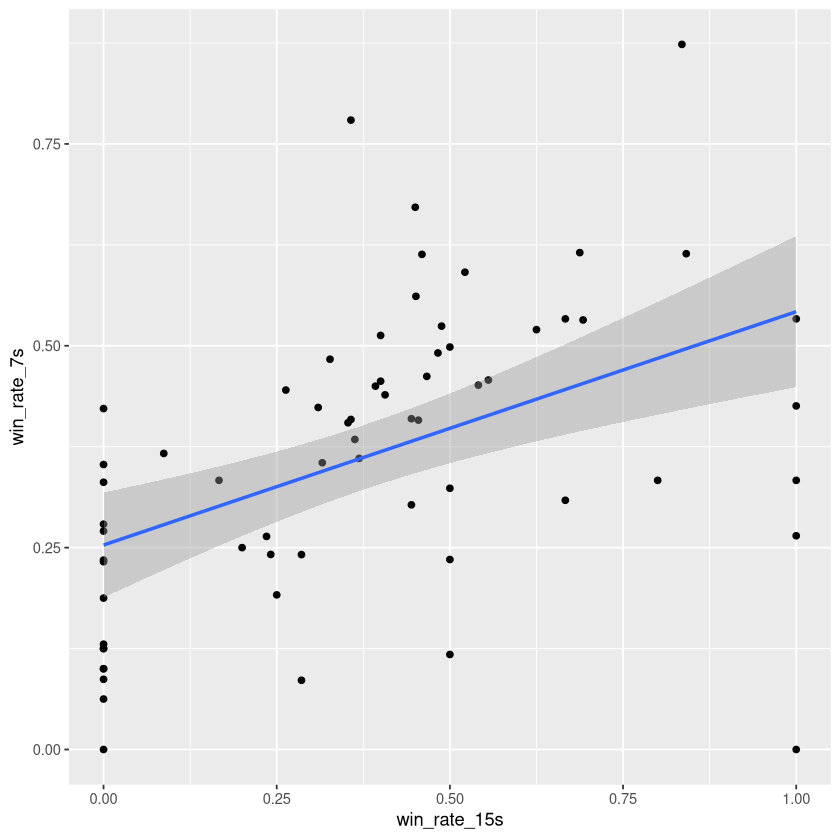

In [84]:
ggplot(team_res, aes(x=win_rate_15s, y=win_rate_7s)) + 
	geom_point() + 
	geom_smooth(method=lm)


The above plot indicates that teams with a stronger 15s squad also tend to have a strong 7s squad. 

There are a few points that need highlighting here. 

1. This is based on win ratios, so is dependent upon the number of matches played. A team may more frequently play 15s but only ocassionsally play 7s perhaps as part of an exhibition match.